In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

In [2]:
df_processed = pd.read_csv("processed_dataset.csv") 

In [3]:
X = df_processed.drop(columns=['num'])   # features only
y = df_processed['num']                  # target

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("PCA-transformed shape:", X_pca.shape)

Original shape: (303, 28)
PCA-transformed shape: (303, 28)


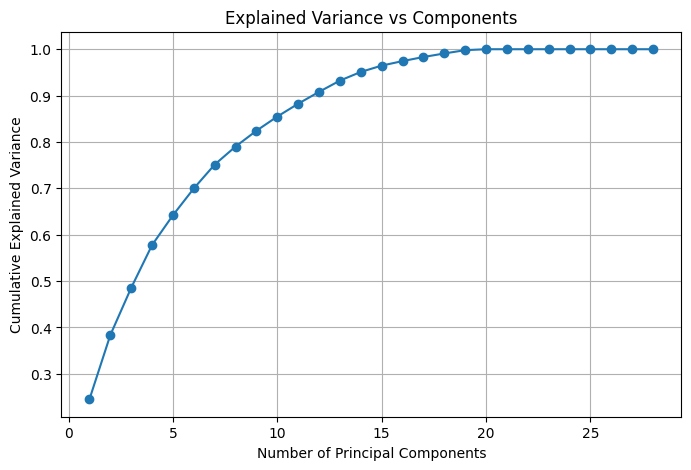

In [5]:
# Explained variance
evr = pca.explained_variance_ratio_
cum_var = np.cumsum(evr)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Components")
plt.grid()
plt.show()

In [6]:
optimal_components = np.argmax(cum_var >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

Optimal number of components: 14


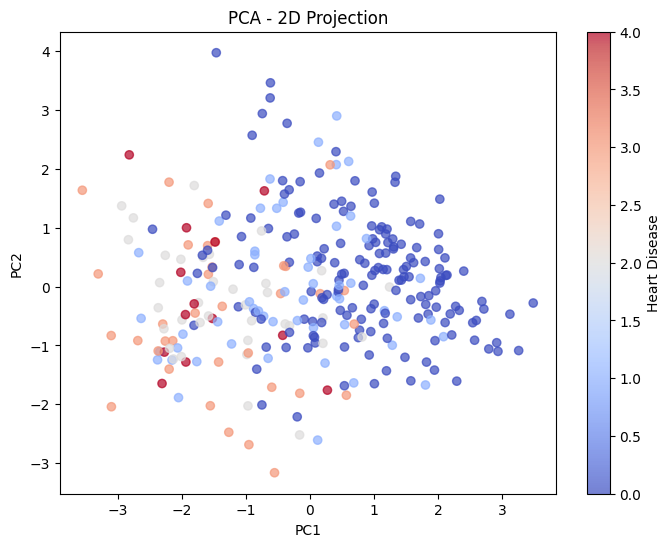

In [8]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - 2D Projection")
plt.colorbar(label="Heart Disease")
plt.show()